In [1]:
# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
#style.use('fivethirtyeight')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras

import sys
sys.path.append("..")

import dataset, network, GPR_Model, prob_dist
import WGAN_Model

# please ensure the WGAN_Model.py is edited to use prediction on a
# non-fixed input, as by default the active function is for fixed input.

# Load data

In [2]:
n_features = 4 

data = pd.read_csv("../data/mtsdata.csv")
print(data.head())

x1, x2, x3 = np.array(data["Surface Area"]*1e13).reshape(-1,1), np.array(data["Concentration"]).reshape(-1,1), np.array(data["Time"]).reshape(-1,1)

X_train = np.concatenate((x1, x2), axis=1)
X_train = np.concatenate((X_train, x3), axis=1)
y_train = np.array(data["Response"]).reshape(-1,1)

X_test = np.concatenate((x1, x2), axis=1)
X_test = np.concatenate((X_test, x3), axis=1)
y_test = np.array(data["Response"]).reshape(-1,1)


   Surface Area  Time  Concentration  Response
0  1.256640e-15     4           0.25  0.640000
1  1.256640e-15     4           0.25  0.236967
2  1.256640e-15     4           0.25  0.291133
3  1.256640e-15     4           0.25  0.022415
4  1.256640e-15     4           0.25  0.049354


# WGAN

### Preprocessing

In [3]:
wgan = WGAN_Model.WGAN(n_features)

In [4]:
train_dataset, scaler, X_train_scaled = wgan.preproc(X_train, y_train)
test_dataset, scaler1, X_test_scaled = wgan.preproc(X_test, y_test)

every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)
every time the data shape (10, 4)


### Training

In [5]:
hist = wgan.train(train_dataset, epochs=100)

Epoch 0/100
discriminator: 0.069510 - generator: -0.116152 - 3s
Epoch 1/100
discriminator: -0.008690 - generator: -0.195970 - 0s
Epoch 2/100
discriminator: 0.090296 - generator: -0.216957 - 0s
Epoch 3/100
discriminator: 0.095899 - generator: -0.259790 - 0s
Epoch 4/100
discriminator: 0.132876 - generator: -0.265611 - 0s
Epoch 5/100
discriminator: 0.020565 - generator: -0.312503 - 0s
Epoch 6/100
discriminator: 0.055511 - generator: -0.249493 - 0s
Epoch 7/100
discriminator: 0.228373 - generator: -0.268670 - 0s
Epoch 8/100
discriminator: 0.230079 - generator: -0.320805 - 0s
Epoch 9/100
discriminator: 0.140628 - generator: -0.331733 - 0s
Epoch 10/100
discriminator: 0.062713 - generator: -0.321336 - 0s
Epoch 11/100
discriminator: 0.190420 - generator: -0.376222 - 0s
Epoch 12/100
discriminator: 0.203620 - generator: -0.382957 - 0s
Epoch 13/100
discriminator: 0.165888 - generator: -0.375297 - 0s
Epoch 14/100
discriminator: 0.192797 - generator: -0.340084 - 0s
Epoch 15/100
discriminator: 0.2578

Loss: 


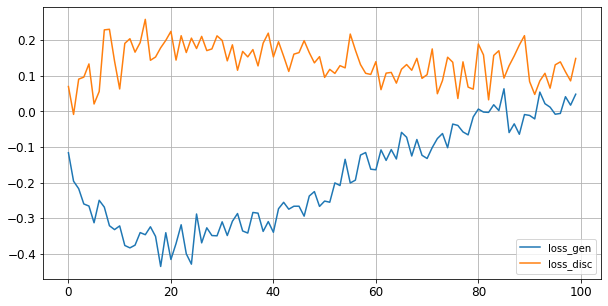

In [6]:
# plot loss
print('Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
ax.plot(hist)
ax.legend(['loss_gen', 'loss_disc'])
#ax.set_yscale('log')
ax.grid()
plt.show()

In [7]:
X_generated = wgan.predict(X_test_scaled, scaler)

Optimizing latent space for point  0  /  90
Optimizing latent space for point  1  /  90
Optimizing latent space for point  2  /  90
Optimizing latent space for point  3  /  90
Optimizing latent space for point  4  /  90
Optimizing latent space for point  5  /  90
Optimizing latent space for point  6  /  90
Optimizing latent space for point  7  /  90
Optimizing latent space for point  8  /  90
Optimizing latent space for point  9  /  90
Optimizing latent space for point  10  /  90
Optimizing latent space for point  11  /  90
Optimizing latent space for point  12  /  90
Optimizing latent space for point  13  /  90
Optimizing latent space for point  14  /  90
Optimizing latent space for point  15  /  90
Optimizing latent space for point  16  /  90
Optimizing latent space for point  17  /  90
Optimizing latent space for point  18  /  90
Optimizing latent space for point  19  /  90
Optimizing latent space for point  20  /  90
Optimizing latent space for point  21  /  90
Optimizing latent sp

# Gaussian Process Regression

In [8]:
ypred_GPR = GPR_Model.train(X_train, y_train, X_test, n_features)

# Comparison

### Prediction Plots

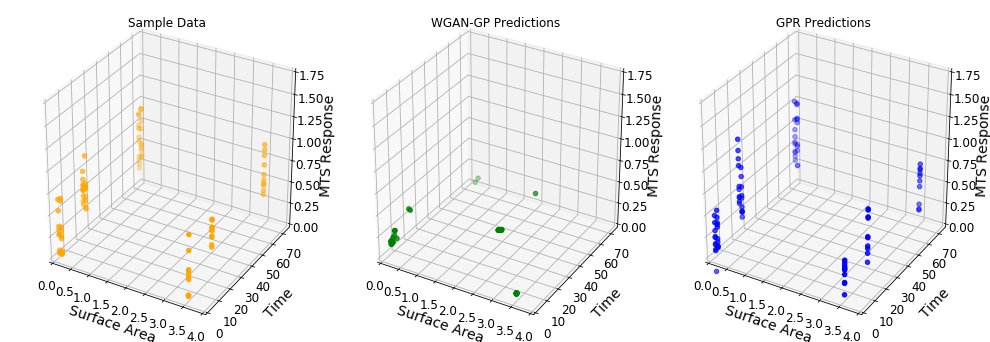

In [9]:
fig = plt.figure(figsize=(13, 4))

#---- First subplot
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(X_test[:,0], X_test[:,2], y_test, color='orange')
ax.set_title("Sample Data")
ax.set_xlabel("Surface Area")
ax.set_ylabel("\n Time")
ax.set_zlabel("MTS Response")
ax.set_xlim(0,4)
ax.set_ylim(-0,75)
ax.set_zlim(0,1.75)

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.scatter(X_generated[:,0], X_generated[:,2], X_generated[:,3], color='green', label='Generated Data')
ax.set_title("WGAN-GP Predictions")
ax.set_xlabel("Surface Area")
ax.set_ylabel("\n Time")
ax.set_zlabel("MTS Response")
ax.set_xlim(0,4)
ax.set_ylim(-0,75)
ax.set_zlim(0,1.75)


ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.scatter(X_test[:,0], X_test[:,2], ypred_GPR, c='b', label='Generated Data')
ax.set_title("GPR Predictions")
ax.set_xlabel("Surface Area")
ax.set_ylabel("\n Time")
ax.set_zlabel("MTS Response")
ax.set_xlim(0,4)
ax.set_ylim(-0,75)
ax.set_zlim(0,1.75)

plt.tight_layout(pad=-2, w_pad=0.8, h_pad=0)

### Probability Density Plots

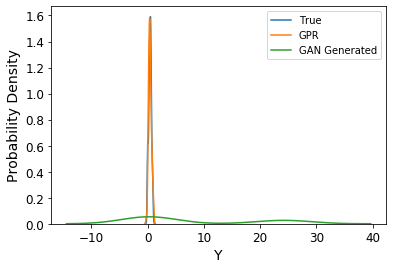

In [10]:
sns.distplot(y_train, hist=False, label='True')
sns.distplot(ypred_GPR, hist=False, label='GPR')
sns.distplot(X_generated[:,1], hist=False, label='GAN Generated')
plt.xlabel("Y")
plt.ylabel("Probability Density")
plt.legend(loc='best');